In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
# # old stuff

# df1 = pd.read_csv('classification_real_data_ds0_7_rs10.csv')

# df2 = pd.read_csv('classification_real_data_2021-Apr-10-16:09:22.csv')

# df3 = pd.concat([df1, df2])

# df3.to_csv('classification_real_data_ds0_9_rs10.csv',index = False)
# df2.data_split.unique()

In [45]:
model = "RandomForestClassifier"
df = pd.read_csv('classification_real_data_ds0_9_rs10_small.csv')
init_shape = df.shape
df = df.query(f'model == "{model}"')
filtered_shape = df.shape

In [46]:
original_cols = df.columns.tolist()
original_shape = df.shape; original_shape

(85500, 13)

In [47]:
# add global metric minima column - init_mse_test
# idx == key, 
# cols - idx == cols to add
cols = ['dataset', 'random_state', 'data_split', 'model', 'imp_type', 'mse_test']
idx = ['dataset', 'random_state', 'data_split', 'model', 'imp_type']

init_metric = df.query('dropped_feature == "full_set"')
init_metric = init_metric.groupby(idx).mcc_test.max()
init_metric = init_metric.rename('init_mcc_test')

# merge into original df
df_full = pd.merge(df, init_metric, on=idx, how='inner')
original_shape, df_full.shape

((85500, 13), (85500, 14))

In [48]:
# add columns related to {max, curr} feature counts, feature_count relative percentages
# idx == key 
# cols - idx == cols to add

cols = ['dataset', 'iteration']
idx = ['dataset']
max_feature_cnt = df[cols]
max_feature_cnt = max_feature_cnt.groupby(idx).max() + 1

max_feature_cnt['f_cnt_10perc'] = np.round((max_feature_cnt.iteration * 0.1)).astype(int)
max_feature_cnt['f_cnt_20perc'] = np.round((max_feature_cnt.iteration * 0.2)).astype(int)
max_feature_cnt['f_cnt_30perc'] = np.round((max_feature_cnt.iteration * 0.3)).astype(int)
max_feature_cnt = max_feature_cnt.rename(columns={'iteration':'max_feature_cnt'})

# merge into original df
df_full = pd.merge(df_full, max_feature_cnt, on=idx, how='inner')
original_shape, df_full.shape

((85500, 13), (85500, 18))

In [7]:
df_full['mcc_delta'] = df_full.mcc_test - df_full.init_mcc_test
df_full['mcc_perc'] = abs(df_full.mcc_test / df_full.init_mcc_test) -1
df_full['feature_cnt'] = df_full.max_feature_cnt - df_full.iteration
df_full['pp_coef'] =  df_full.mcc_test / df_full.init_mcc_test

# max_perc grouping
grouping = ['dataset', 'random_state', 'data_split', 'model', 'imp_type']

# select all non-base models
max_perc = df_full.query('iteration > 0')
max_perc = max_perc.groupby(grouping).mcc_perc.max()
max_perc = max_perc.rename('max_perc')

df_full = pd.merge(df_full, max_perc, on=grouping, how='inner')
original_shape, df_full.shape

((85500, 13), (85500, 23))

In [8]:
# df_full.query('dataset =="breast_cancer"')

In [9]:
# grouping = ['dataset', 'random_state', 'data_split', 'model', 'imp_type']

# max_perc = df_full.query('iteration > 0')
# max_perc = max_perc.groupby(grouping).mse_perc.max()
# max_perc = max_perc.rename('max_perc')

# df_full = df_full.join(max_perc, on=grouping)

In [10]:
df_full['feature_dropped'] =  df_full.max_feature_cnt - df_full.feature_cnt
df_full['feature_dropped_perc'] = (1 - (df_full.max_feature_cnt - df_full.feature_dropped) 
                                   / df_full.max_feature_cnt)

In [11]:
repr_lst = ['iteration'] + df_full.columns[5:].to_list()

In [12]:
df_res = df_full[repr_lst]

In [13]:
# Case1: Can we get a metric improvement
# Case2: No decrease in metric
# Case3: Maximum interpretability (use [0.1, 0.2, 0.3] of all features)

In [19]:
df_res.dataset.unique()

array(['wine', 'breast_cancer', 'phishing', 'mushroom'], dtype=object)

In [25]:
test = df_full

In [40]:
# test['CUM_CONCAT']=[y.dropped_feature.tolist()[:z+1] for x, y in test.groupby(['model','imp_type', 'dataset','random_state', 'data_split'])for z in range(len(y))]

# test.groupby(['model','imp_type', 'dataset','random_state', 'data_split']).dropped_feature.apply(list)[0]

In [37]:
test.group('')

In [27]:
test.head(10)

,iteration,dropped_feature,feat_ind,feat_name,mcc_train,mcc_test,model,imp_type,dataset,random_state,...,f_cnt_10perc,f_cnt_20perc,f_cnt_30perc,mcc_delta,mcc_perc,feature_cnt,pp_coef,max_perc,feature_dropped,feature_dropped_perc
0,0,full_set,7,nonflavanoid_phenols,1.0,1.000000,RandomForestClassifier,gini,wine,0,...,1,3,4,0.000000,0.000000,13,1.000000,0.0,0,0.000000
1,1,nonflavanoid_phenols,2,ash,1.0,1.000000,RandomForestClassifier,gini,wine,0,...,1,3,4,0.000000,0.000000,12,1.000000,0.0,1,0.076923
2,2,ash,8,proanthocyanins,1.0,1.000000,RandomForestClassifier,gini,wine,0,...,1,3,4,0.000000,0.000000,11,1.000000,0.0,2,0.153846
3,3,proanthocyanins,1,malic_acid,1.0,1.000000,RandomForestClassifier,gini,wine,0,...,1,3,4,0.000000,0.000000,10,1.000000,0.0,3,0.230769
4,4,malic_acid,4,magnesium,1.0,1.000000,RandomForestClassifier,gini,wine,0,...,1,3,4,0.000000,0.000000,9,1.000000,0.0,4,0.307692
5,5,magnesium,3,alcalinity_of_ash,1.0,0.972511,RandomForestClassifier,gini,wine,0,...,1,3,4,-0.027489,-0.027489,8,0.972511,0.0,5,0.384615
6,6,alcalinity_of_ash,5,total_phenols,1.0,0.972511,RandomForestClassifier,gini,wine,0,...,1,3,4,-0.027489,-0.027489,7,0.972511,0.0,6,0.461538
7,7,total_phenols,10,hue,1.0,1.000000,RandomForestClassifier,gini,wine,0,...,1,3,4,0.000000,0.000000,6,1.000000,0.0,7,0.538462
8,8,hue,0,alcohol,1.0,1.000000,RandomForestClassifier,gini,wine,0,...,1,3,4,0.000000,0.000000,5,1.000000,0.0,8,0.615385
9,9,alcohol,11,od280/od315_of_diluted_wines,1.0,0.972427,RandomForestClassifier,gini,wine,0,...,1,3,4,-0.027573,-0.027573,4,0.972427,0.0,9,0.692308


In [22]:
df_res.columns

Index(['iteration', 'mcc_test', 'model', 'imp_type', 'dataset', 'random_state',
       'data_split', 'mse_train', 'mse_test', 'init_mcc_test',
       'max_feature_cnt', 'f_cnt_10perc', 'f_cnt_20perc', 'f_cnt_30perc',
       'mcc_delta', 'mcc_perc', 'feature_cnt', 'pp_coef', 'max_perc',
       'feature_dropped', 'feature_dropped_perc'],
      dtype='object')

In [23]:
df_full.query('dataset == "breast_cancer"')

,iteration,dropped_feature,feat_ind,feat_name,mcc_train,mcc_test,model,imp_type,dataset,random_state,...,f_cnt_10perc,f_cnt_20perc,f_cnt_30perc,mcc_delta,mcc_perc,feature_cnt,pp_coef,max_perc,feature_dropped,feature_dropped_perc
11700,0,full_set,16,concavity error,1.000000,0.900117,RandomForestClassifier,gini,breast_cancer,0,...,3,6,9,0.000000,0.000000,30,1.000000,0.013645,0,0.000000
11701,1,concavity error,8,mean symmetry,1.000000,0.900117,RandomForestClassifier,gini,breast_cancer,0,...,3,6,9,0.000000,0.000000,29,1.000000,0.013645,1,0.033333
11702,2,mean symmetry,14,smoothness error,1.000000,0.912399,RandomForestClassifier,gini,breast_cancer,0,...,3,6,9,0.012282,0.013645,28,1.013645,0.013645,2,0.066667
11703,3,smoothness error,17,concave points error,1.000000,0.912399,RandomForestClassifier,gini,breast_cancer,0,...,3,6,9,0.012282,0.013645,27,1.013645,0.013645,3,0.100000
11704,4,concave points error,18,symmetry error,1.000000,0.900117,RandomForestClassifier,gini,breast_cancer,0,...,3,6,9,0.000000,0.000000,26,1.000000,0.013645,4,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38695,25,fractal dimension error,15,compactness error,1.000000,0.451895,RandomForestClassifier,pps,breast_cancer,9,...,3,6,9,-0.447875,-0.497766,5,0.502234,0.028138,25,0.833333
38696,26,compactness error,11,texture error,1.000000,0.173488,RandomForestClassifier,pps,breast_cancer,9,...,3,6,9,-0.726282,-0.807186,4,0.192814,0.028138,26,0.866667
38697,27,texture error,18,symmetry error,1.000000,0.321114,RandomForestClassifier,pps,breast_cancer,9,...,3,6,9,-0.578656,-0.643115,3,0.356885,0.028138,27,0.900000
38698,28,symmetry error,14,smoothness error,1.000000,0.201281,RandomForestClassifier,pps,breast_cancer,9,...,3,6,9,-0.698489,-0.776298,2,0.223702,0.028138,28,0.933333


Text(0, 0.5, 'best percent gain/loss with feature reduction from base model')

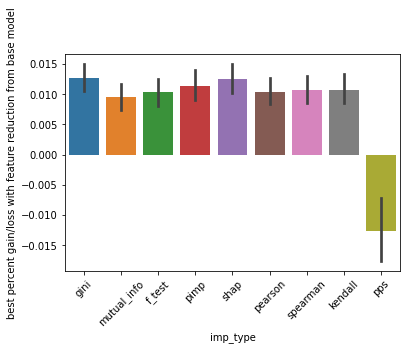

In [14]:
# Case1: Can we get a metric improvement
case_1 = df_res.query('dataset != ["mushroom", "wine"]')
case_1 = case_1[['imp_type','max_perc','random_state', 'data_split', 'dataset']]; 
case_1 = case_1.drop_duplicates();

# plot case_1
plot = sns.barplot(x='imp_type', y='max_perc', ci=95,
            data=case_1
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
plot.set_ylabel('best percent gain/loss with feature reduction from base model')

In [15]:
# case_2 = df_full.query('mcc_test  > init_mcc_test')[grouping]

In [16]:
# case_2 = df_full
# grouping = ['imp_type', 'random_state', 
#             'data_split', 'dataset']
# max_dropped = case_2.query('mcc_test  > init_mcc_test')
# max_dropped = (max_dropped[grouping + ['feature_dropped_perc']]
#                .groupby(grouping).max())
# max_dropped = max_dropped.rename(columns={"feature_dropped_perc": "max_dropped"})

# df_full[grouping].drop_duplicates()

Text(0, 0.5, 'percent of features dropped without accuracy loss')

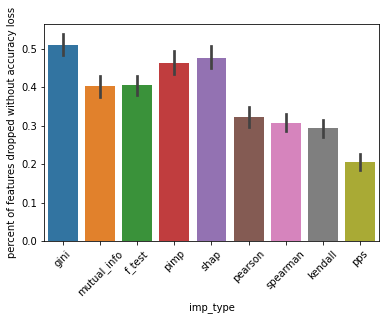

In [17]:
# Case2: No decrease in metric
case_2 = df_full
# case_2 = case_2.query('mse_perc >= 0')

case_2['feature_dropped'] =  case_2.max_feature_cnt - case_2.feature_cnt

# 
case_2['feature_dropped_perc'] = (
                                    1 - (case_2.max_feature_cnt - case_2.feature_dropped)
                                      / case_2.max_feature_cnt
                                    )

grouping = ['imp_type', 'random_state', 
            'data_split', 'dataset']
max_dropped = case_2.query('mcc_test  >= init_mcc_test')
max_dropped = (max_dropped[grouping + ['feature_dropped_perc']]
               .groupby(grouping).max())
max_dropped = max_dropped.rename(columns={"feature_dropped_perc": "max_dropped"})

case_2 = case_2[grouping].drop_duplicates()
case_2 = pd.merge(case_2, max_dropped, on=grouping, how='left')
case_2 = case_2.fillna(0)
# case_2 = case_2.query('feature_dropped_perc == max_dropped')

plot = sns.barplot(x='imp_type', y='max_dropped',
            data=case_2, order=case_1.imp_type.unique().tolist()
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
plot.set_ylabel('percent of features dropped without accuracy loss')

In [18]:
# Case 3: Maximum interpretability (drop [70%, 80%, 90%] of all features, rounded)

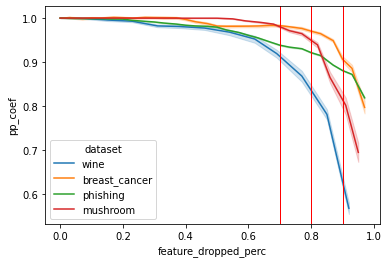

In [19]:
# Let's check out if there is a general pattern of dataset predictive power (pp) coef decrease
# over features dropped percentage

# For most datasets we see a significant decrease at around 80%ish features dropped
# the one exception is boston dataset which seems to drop in predictive power from 30%ish

# choosing to drop 70%, 80%, 90% seems like a reasonable way 
# to find maximally interpretable models that don't sacrifice the metric significantly

case3_1 = df_full[['feature_cnt', 'feature_dropped_perc', 'pp_coef', 'imp_type',
                  'random_state', 'data_split', 'dataset', 'model']]
case3_1 = case3_1.drop_duplicates()
case3_1['feature_dropped_perc'] = case3_1.feature_dropped_perc.round(decimals=2)

case3_1
plot = sns.lineplot(x='feature_dropped_perc', y='pp_coef', hue='dataset', ci=100,
            data=case3_1.query(f'''
        model == "RandomForestClassifier" and \
        imp_type != "pps"
                ''')
            )
plot.axvline(0.7, 0,1, linewidth=1, color='r')
plot.axvline(0.8, 0,1, linewidth=1, color='r')
plot.axvline(0.9, 0,1, linewidth=1, color='r')

In [20]:
sub1 = df_res[df_res.f_cnt_10perc == df_res.feature_cnt]
sub2 = df_res[df_res.f_cnt_20perc == df_res.feature_cnt]
sub3 = df_res[df_res.f_cnt_30perc == df_res.feature_cnt]

In [21]:
case3_2 = pd.concat([sub1, sub2, sub3])

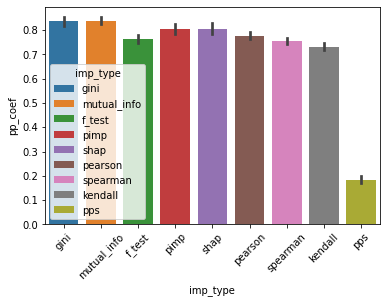

In [22]:
# 90% dropped
plot = sns.barplot(x='imp_type', y='pp_coef', hue='imp_type', ci=95, dodge=False,
            data=sub1
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

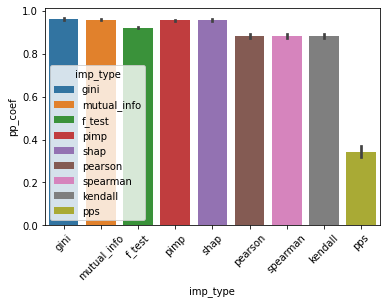

In [23]:
# 80% dropped
plot = sns.barplot(x='imp_type', y='pp_coef', hue='imp_type', ci=95, dodge=False,
            data=sub2
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

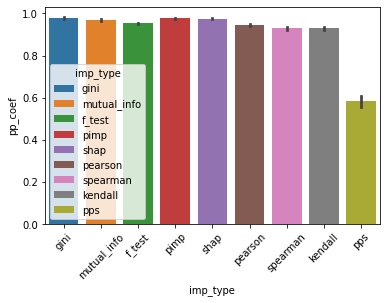

In [24]:
# 70% dropped
plot = sns.barplot(x='imp_type', y='pp_coef', hue='imp_type', ci=95, dodge=False,
            data=sub3
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

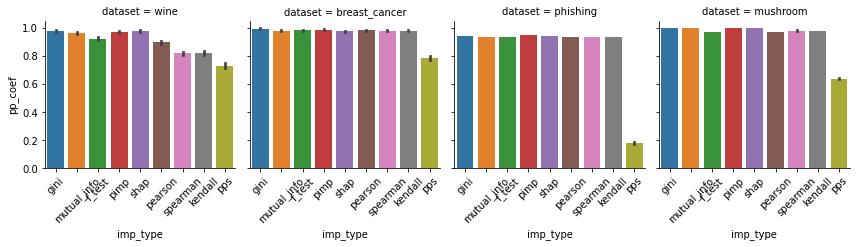

In [25]:
# Since all of the graphs above are aggregate graphs (all datasets together)
# It might be useful to also see the difference between datasets

# maybe turn this into a stacked bar chart stacks = [70%, 80%, 90%], pp_coef
g = sns.FacetGrid(sub3, col='dataset', hue='imp_type')
g.map(sns.barplot,'imp_type', 'pp_coef', ci=95, data=sub3, dodge=False, 
      order=sub3.imp_type.unique().tolist())
g.set_xticklabels(rotation=45)

# 70% dropped

In [26]:
def get_result_table():
    # Case1: Can we get a metric improvement
    # Case2: No decrease in metric
    # Case3: Maximum interpretability (use [0.1, 0.2, 0.3] of all features)
    # 1 in table
    var_dropped = case_2.groupby('imp_type').mean().max_dropped
    model_gain = case_1.groupby('imp_type').mean().max_perc
    minimal_model_acc = sub2[['imp_type', 'pp_coef']].groupby('imp_type').mean().squeeze()
    
    table = pd.DataFrame(
    {
        'variables_dropped': var_dropped,
        'model_gain': model_gain,
        'minimal_model_acc': minimal_model_acc
    }
    )
    return table

In [27]:
table = get_result_table()

In [28]:
table

,variables_dropped,model_gain,minimal_model_acc
imp_type,,,
f_test,0.404899,0.010310,0.921354
gini,0.509758,0.012676,0.961663
kendall,0.293244,0.010740,0.880321
mutual_info,0.402150,0.009513,0.959151
pearson,0.322783,0.010310,0.881624
pimp,0.463297,0.011272,0.954793
pps,0.206274,-0.012597,0.344127
shap,0.476748,0.012426,0.957304
spearman,0.306775,0.010740,0.881321


In [29]:
# Case1: Can we get a metric improvement
# Case2: No decrease in metric HAS BUGS
# Case3: Maximum interpretability (use [0.1, 0.2, 0.3] of all features)

result_type = 'classification'
case_1.to_csv(f'./results/case1_{result_type}.csv', index=False)
case_2.to_csv(f'./results/case2_{result_type}.csv', index=False)
sub2[['imp_type','pp_coef', 'random_state', 'data_split', 'dataset']].to_csv(f'./results/case3_{result_type}.csv', index=False)